In [1]:

from pyscisci.datasource.DBLP import DBLP
from pyscisci.utils import groupby_count

import numpy as np
import matplotlib.pylab as plt
try:
    import seaborn as sns
    sns.set_style('white')
except:
    pass

%matplotlib inline

In [2]:
# set this path to where the DBLP database will be stored
path2dblp = '/home/ajgates/DBLP'

In [3]:
mydblp = DBLP(path2dblp, keep_in_memory=False) 

# set keep_in_memory=False if you want to load the database each time its needed - good for when you 
# cant keep more than one DataFrame in memory at a time

# otherwise keep_in_memory=True will keep each DataFrame in memory after its loaded

In [4]:
# only need to run this for the first time
# usually takes about 1-2min to download
mydblp.download_from_source()

In [ ]:
# before we can start running our analysis, we have to preprocess the raw data into
# DataFrames that are more convinent to work with
mydblp.preprocess()

In [ ]:
# DBLP creates three dataframes:
# pub_df - keeps all of the publication information
# columns : ['PublicationId', 'Title', 'Year', 'Month', 'Volume', 'Number', 'Pages', 'JournalId', 'EE', 'DocType', TeamSize']

# author_df - keeps all of the author information
# columns : ['AuthorId', 'FullName', 'LastName', 'FirstName', 'MiddleName']

# author2pub_df - links the authors to their publications
# columns : ['PublicationId', 'AuthorId', 'AuthorSequence']

# NOTE: DBLP does not contain citation information

In [ ]:
# lets plot the number of publications each year
yearly_articles = groupby_count(df=mydblp.pub_df, colgroupby='Year', colcountby='PublicationId', count_unique=True)
yearly_articles.sort_values(by='Year', inplace=True)
yearly_articles = yearly_articles.loc[yearly_articles['Year'] > 0]

fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(yearly_articles['Year'],yearly_articles['PublicationIdCount'])

ax.set_xlabel('Year')
ax.set_ylabel("# of publications")
ax.set_yscale('log')

plt.show()

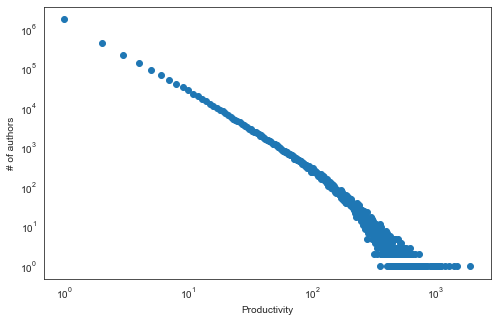

In [5]:
# now we can see the distribution of author productivity 
author_prod = mydblp.author_productivity()

prodvalues, prodcounts = np.unique(author_prod['Productivity'].values, return_counts=True)

fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.scatter(prodvalues, prodcounts)

ax.set_xlabel('Productivity')
ax.set_ylabel("# of authors")
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()